## Carga de librerias

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt


In [15]:
sns.set(rc={'figure.figsize':(18,18)})

# Carga de datos ventas

In [16]:
data = pd.read_csv("../Data/data.csv")
data["date"] = data["day"].astype(str)+"-"+data["month"].astype(str)+"-"+data["year"].astype(str)
data["date"] = pd.to_datetime(data["date"],format="%d-%m-%Y")
data.sort_values(["year","month","day"],ascending=False).head()

,producto,year,month,day,precio_min,precio_max,precio_mean,date
1578,CEBOLLA CABEZA BLANCA NACIONAL,2022,8,30,1.50,2.0,1.73,2022-08-30
1579,CEBOLLA CABEZA ROJA/MAJ/TAMB/LOC/CAM/MIL,2022,8,30,1.50,2.0,1.75,2022-08-30
1580,CEBOLLA CHINA (CRIOLLA/SERRANA),2022,8,30,1.50,2.0,1.75,2022-08-30
1581,PAPA AMARILLA,2022,8,30,3.50,4.0,3.75,2022-08-30
1582,PAPA BLANCA/VALLE/OTROS,2022,8,30,1.65,1.9,1.76,2022-08-30


In [17]:
data["producto"].value_counts()

PAPA YUNGAY                                 3174
CEBOLLA CHINA (CRIOLLA/SERRANA)             3174
PAPA AMARILLA                               3174
PAPA CANCHAN                                3174
PAPA COLOR/VALLE/OTROS                      3174
PAPA HUAYRO (ROJO-MORO-NEGRO)RUNT/MARH/U    3174
CEBOLLA CABEZA BLANCA NACIONAL              3173
PAPA UNICA                                  3173
CEBOLLA CABEZA ROJA/MAJ/TAMB/LOC/CAM/MIL    3173
PAPA NEGRA ANDINA                           3172
PAPA BLANCA/VALLE/OTROS                     3172
PAPA PERUANITA (INJERTO)                    3171
PAPA HUAMANTANGA                            3151
PAPA PERRICHOLI                             2238
PAPA AMARILIS                                 94
PAPA TOMASA                                    9
PAPA CAPIRO                                    7
Name: producto, dtype: int64

# Carga de datos procedencia

In [18]:
dataProcedencia = pd.read_csv("../Data/procedencia_papas.csv", encoding="iso8859-1")
dataProcedencia["date"] = dataProcedencia["day"].astype(str)+"-"+dataProcedencia["month"].astype(str)+"-"+dataProcedencia["year"].astype(str)
dataProcedencia["date"] = pd.to_datetime(dataProcedencia["date"],format="%d-%m-%Y")
dataProcedencia.sort_values(["year","month","day"],ascending=False).head()

,producto,procedencia,year,month,day,cantidad (TM),date
18877,PAPA AMARILLA,APURIMAC,2022,8,31,0,2022-08-31
18908,PAPA AMARILLA,AYACUCHO,2022,8,31,0,2022-08-31
18939,PAPA AMARILLA,HUANCAVELICA,2022,8,31,0,2022-08-31
18970,PAPA AMARILLA,HUANUCO,2022,8,31,0,2022-08-31
19001,PAPA AMARILLA,ICA,2022,8,31,0,2022-08-31


In [19]:
dataProcedencia["procedencia"].value_counts()

JUNIN           28485
HUANUCO         25872
LIMA            20613
PASCO           19168
AYACUCHO        18850
APURIMAC        16387
AREQUIPA        14686
HUANCAVELICA    13365
ICA             12101
LA LIBERTAD      8802
ANCASH           3348
LAMBAYEQUE       3091
CUSCO             911
CAJAMARCA         538
MOQUEGUA          215
PIURA             182
TACNA             119
TUMBES             61
AMAZONAS           58
SAN MARTIN         30
Name: procedencia, dtype: int64

### Filtro de papas con pocos datos

In [20]:
data = data[(data.producto != "PAPA AMARILIS") & (data.producto != "PAPA CAPIRO") & (data.producto != "PAPA TOMASA") & (data.producto != "PAPA PERRICHOLI")]

# Análisis Cebollas

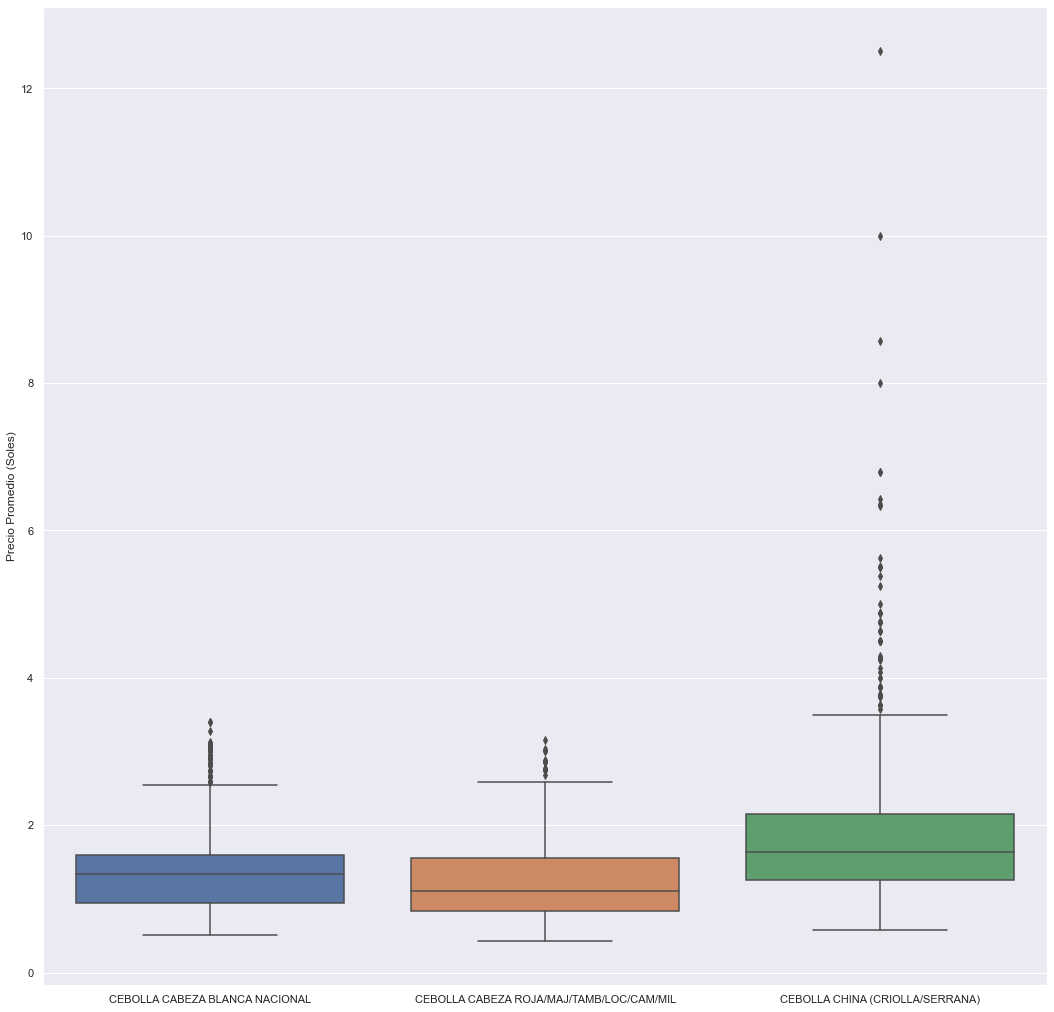

In [21]:
cebollas = data[data.producto.astype(str).str.contains("CEBOLLA")]
ax = sns.boxplot(x="producto",y="precio_mean",data=cebollas)
ax.set_xlabel("")
ax.set_ylabel("Precio Promedio (Soles)")
fig = ax.get_figure()
fig.savefig("./Graphs/box_cebolla.png")

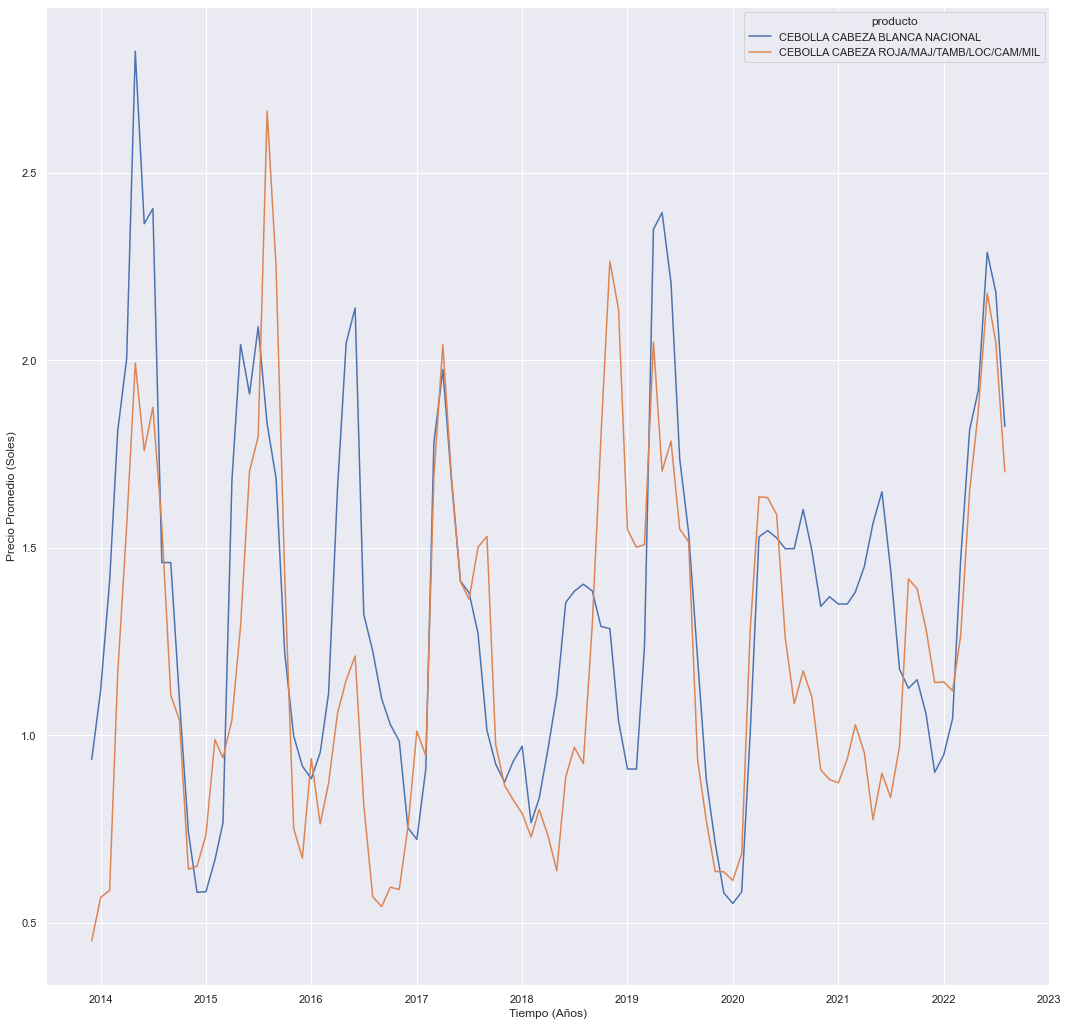

In [22]:
cebollas = cebollas[~cebollas.producto.astype(str).str.contains("CHINA")]
monthAvg = cebollas.groupby(["producto","year","month"]).agg({"precio_mean": "mean"}).reset_index()
monthAvg["date"] = monthAvg["month"].astype(str)+"-"+monthAvg["year"].astype(str)
monthAvg["date"] = pd.to_datetime(monthAvg["date"],format="%m-%Y")
monthAvg = monthAvg[monthAvg.producto.astype(str).str.contains("CEBOLLA")]
ax = sns.lineplot(data=monthAvg,x="date", y="precio_mean", hue="producto")
ax.set_xlabel("Tiempo (Años)")
ax.set_ylabel("Precio Promedio (Soles)")
fig = ax.get_figure()
fig.savefig("./Graphs/cebolla.png")


# Análisis Papas

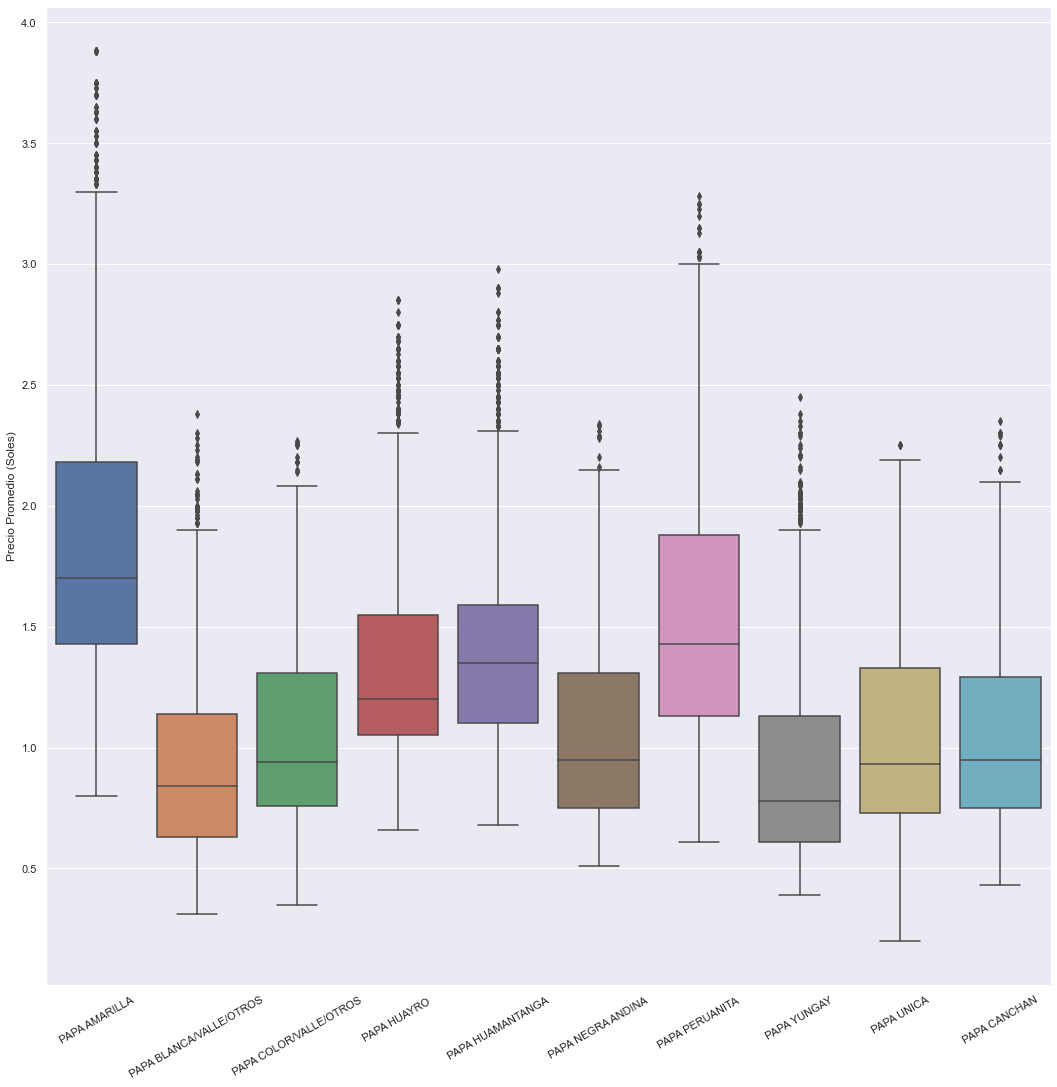

In [23]:
papas = data[data.producto.astype(str).str.contains("PAPA")]
ax = sns.boxplot(x="producto",y="precio_mean",data=papas)
ax.set_xlabel("")
ax.set_ylabel("Precio Promedio (Soles)")
ax.set_xticklabels([label.get_text().split("(")[0] for label in ax.get_xticklabels()],rotation=30)
fig = ax.get_figure()
fig.savefig("./Graphs/box_papa.png")

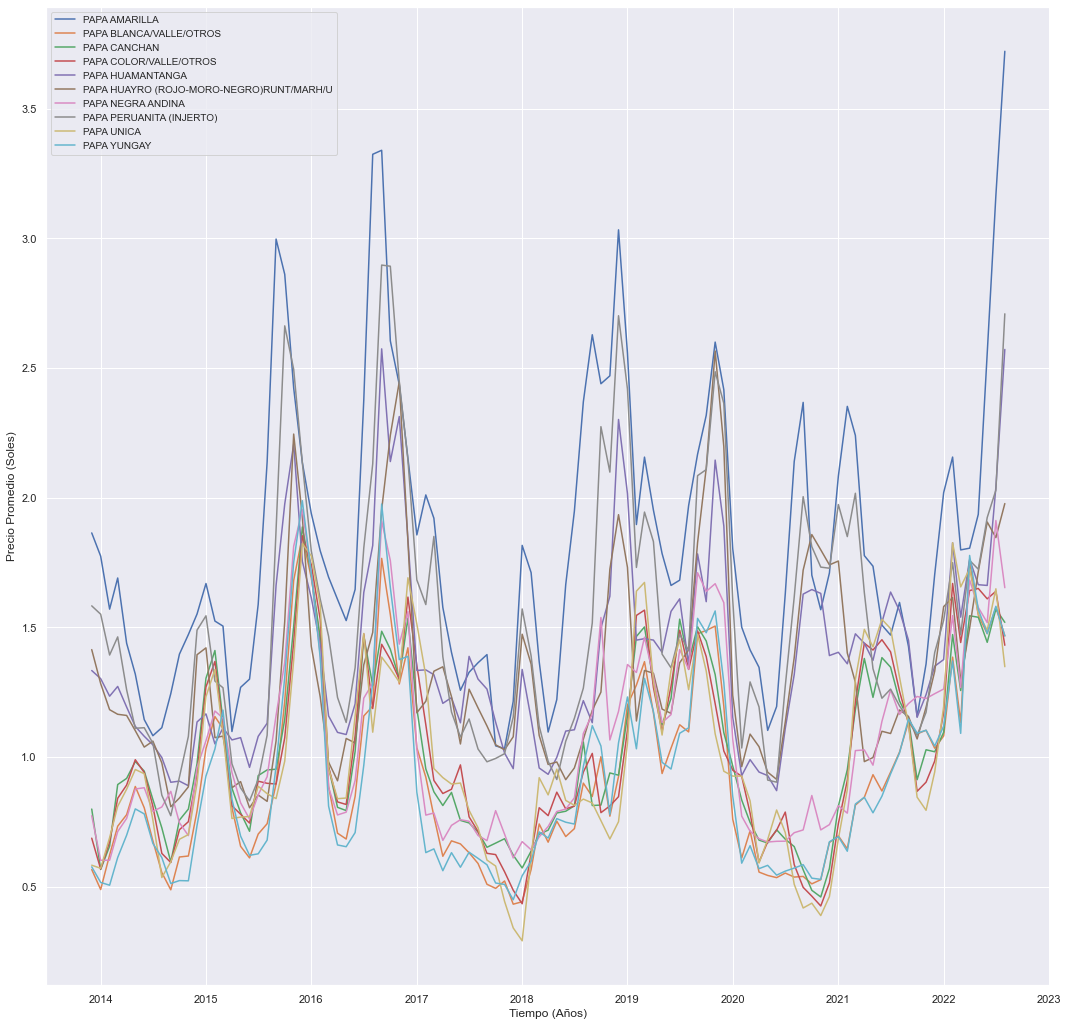

In [24]:
monthAvg = (
    papas.groupby(["producto", "year", "month"])
    .agg({"precio_mean": "mean"})
    .reset_index()
)
monthAvg["date"] = monthAvg["month"].astype(str) + "-" + monthAvg["year"].astype(str)
monthAvg["date"] = pd.to_datetime(monthAvg["date"], format="%m-%Y")

ax = sns.lineplot(
    data=monthAvg,
    x="date",
    y="precio_mean",
    hue="producto",
)
ax.set_xlabel("Tiempo (Años)")
ax.set_ylabel("Precio Promedio (Soles)")
plt.legend(fontsize="10")
fig = ax.get_figure()
fig.savefig("./Graphs/papas.png")


## Separación por grupos de papas

In [25]:
papas_g1 = papas[
    (papas["producto"].astype(str).str.contains("HUAYRO"))
    | (papas["producto"].astype(str).str.contains("PERUANITA"))
    | (papas["producto"].astype(str).str.contains("HUAMANTANGA"))
    | (papas["producto"].astype(str).str.contains("AMARILLA"))
]

papas_procedencia_g1 = dataProcedencia[
    (dataProcedencia["producto"].astype(str).str.contains("ROJO-MORO-NEGRO"))
    | (dataProcedencia["producto"].astype(str).str.contains("PERUANITA"))
    | (dataProcedencia["producto"].astype(str).str.contains("HUAMANTANGA"))
    | (dataProcedencia["producto"].astype(str).str.contains("AMARILLA"))
]

papas_g2 = papas[
    ~(
        (papas["producto"].astype(str).str.contains("HUAYRO"))
        | (papas["producto"].astype(str).str.contains("PERUANITA"))
        | (papas["producto"].astype(str).str.contains("HUAMANTANGA"))
        | (papas["producto"].astype(str).str.contains("AMARILLA"))
    )
]

papas_procedencia_g2 = dataProcedencia[
    (dataProcedencia["producto"].astype(str).str.contains("BLANCA/VALLE"))
    | (dataProcedencia["producto"].astype(str).str.contains("CANCHAN"))
    | (dataProcedencia["producto"].astype(str).str.contains("COLOR/VALLE"))
    | (dataProcedencia["producto"].astype(str).str.contains("NEGRA ANDINA"))
    | (dataProcedencia["producto"].astype(str).str.contains("UNICA"))
    | (dataProcedencia["producto"].astype(str).str.contains("YUNGAY"))
]

papas_g1.to_csv("../Data/papas_g1_diaria.csv", index=False)
papas_g2.to_csv("../Data/papas_g2_diaria.csv", index=False)

papas_procedencia_g1.to_csv("../Data/papas_procedencia_g1_diaria.csv", index=False)
papas_procedencia_g2.to_csv("../Data/papas_procedencia_g2_diaria.csv", index=False)


In [26]:
papas_procedencia_g1

,producto,procedencia,year,month,day,cantidad (TM),date
0,PAPA AMARILLA,APURIMAC,2015,1,1,0,2015-01-01
1,PAPA AMARILLA,APURIMAC,2015,1,2,0,2015-01-02
2,PAPA AMARILLA,APURIMAC,2015,1,3,0,2015-01-03
3,PAPA AMARILLA,APURIMAC,2015,1,4,0,2015-01-04
4,PAPA AMARILLA,APURIMAC,2015,1,5,0,2015-01-05
...,...,...,...,...,...,...,...
105194,PAPA PERUANITA (INJERTO),PASCO,2022,8,27,0,2022-08-27
105195,PAPA PERUANITA (INJERTO),PASCO,2022,8,28,0,2022-08-28
105196,PAPA PERUANITA (INJERTO),PASCO,2022,8,29,0,2022-08-29
105197,PAPA PERUANITA (INJERTO),PASCO,2022,8,30,0,2022-08-30


### Grupo 1

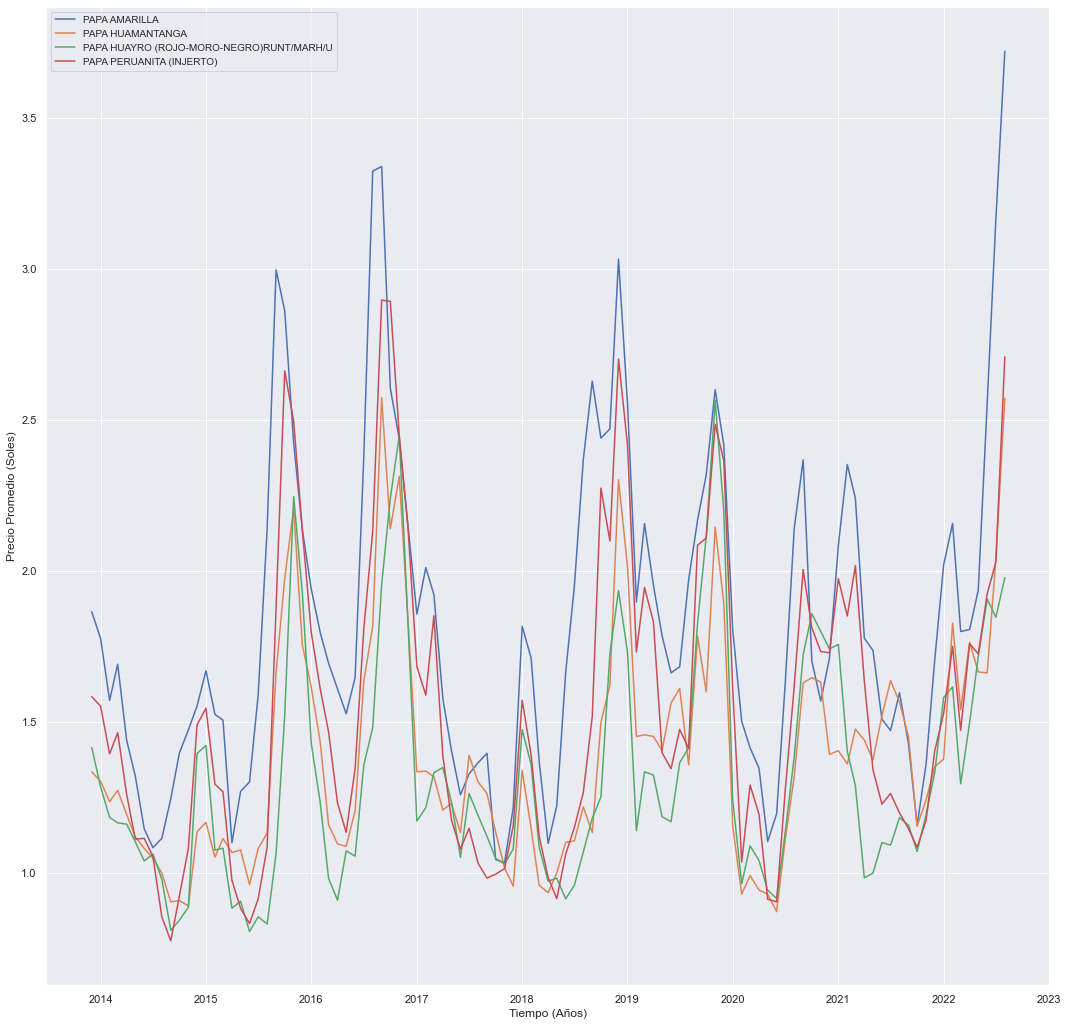

In [27]:
monthAvg = (
    papas_g1.groupby(["producto", "year", "month"])
    .agg({"precio_mean": "mean"})
    .reset_index()
)
monthAvg["date"] = monthAvg["month"].astype(str) + "-" + monthAvg["year"].astype(str)
monthAvg["date"] = pd.to_datetime(monthAvg["date"], format="%m-%Y")

ax = sns.lineplot(
    data=monthAvg,
    x="date",
    y="precio_mean",
    hue="producto",
)
ax.set_xlabel("Tiempo (Años)")
ax.set_ylabel("Precio Promedio (Soles)")
plt.legend(fontsize="10")
fig = ax.get_figure()
fig.savefig("./Graphs/papas_g1.png")


### Grupo 2

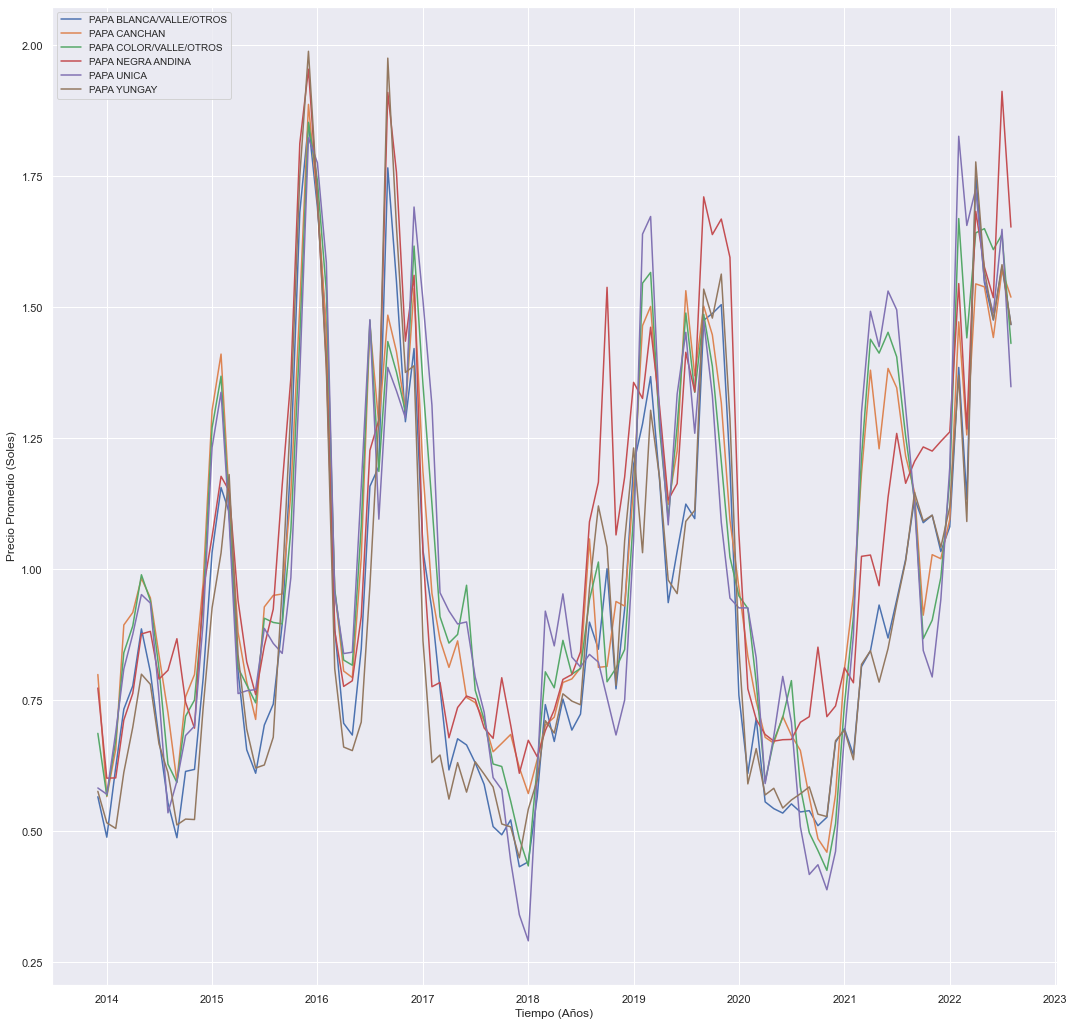

In [28]:
monthAvg = (
    papas_g2.groupby(["producto", "year", "month"])
    .agg({"precio_mean": "mean"})
    .reset_index()
)
monthAvg["date"] = monthAvg["month"].astype(str) + "-" + monthAvg["year"].astype(str)
monthAvg["date"] = pd.to_datetime(monthAvg["date"], format="%m-%Y")

ax = sns.lineplot(
    data=monthAvg,
    x="date",
    y="precio_mean",
    hue="producto",
)
ax.set_xlabel("Tiempo (Años)")
ax.set_ylabel("Precio Promedio (Soles)")
plt.legend(fontsize="10")
fig = ax.get_figure()
fig.savefig("./Graphs/papas_g2.png")


# Guardamos promedio por meses de las papas y cebollas

In [29]:
papas_g1_processed = (
    papas_g1.groupby(["producto", "year", "month"])
    .agg({"precio_mean": "mean"})
    .reset_index()
)
papas_g2_processed = (
    papas_g2.groupby(["producto", "year", "month"])
    .agg({"precio_mean": "mean"})
    .reset_index()
)
cebollas_processed = (
    cebollas.groupby(["producto", "year", "month"])
    .agg({"precio_mean": "mean"})
    .reset_index()
)

papas_g1_processed["month"] = papas_g1_processed["month"].apply(
    lambda x: "0" + str(x) if len(str(x)) == 1 else str(x)
)
papas_g2_processed["month"] = papas_g2_processed["month"].apply(
    lambda x: "0" + str(x) if len(str(x)) == 1 else str(x)
)
cebollas_processed["month"] = cebollas_processed["month"].apply(
    lambda x: "0" + str(x) if len(str(x)) == 1 else str(x)
)

papas_g1_processed["date"] = (
    papas_g1_processed["year"].astype(str)
    + "-"
    + papas_g1_processed["month"].astype(str)
)
papas_g2_processed["date"] = (
    papas_g2_processed["year"].astype(str)
    + "-"
    + papas_g2_processed["month"].astype(str)
)
cebollas_processed["date"] = (
    cebollas_processed["year"].astype(str)
    + "-"
    + cebollas_processed["month"].astype(str)
)

papas_g1_processed[["producto", "date", "precio_mean"]].to_csv(
    "../Data/papas_g1.csv", index=False
)
papas_g2_processed[["producto", "date", "precio_mean"]].to_csv(
    "../Data/papas_g2.csv", index=False
)
cebollas_processed[["producto", "date", "precio_mean"]].to_csv(
    "../Data/cebollas.csv", index=False
)


# Análisis por procedencia

Ajustamos datos de ventas para que esten en el mismo rango de fechas que los datos de procedencia

In [30]:
def fill_dates_precio(df):
    df = df.reindex(pd.date_range("01-01-2015", "08-30-2022"))
    # df["precio_mean"] = df["precio_mean"].fillna(0)
    return df


papas_g1_completo = (
    papas_g1.set_index("date")
    .groupby("producto")
    .apply(fill_dates_precio)
    .rename_axis(("producto", "date"))
    .drop("producto", 1)
    .reset_index()[["producto", "date", "precio_mean"]]
)

papas_g2_completo = (
    papas_g2.set_index("date")
    .groupby("producto")
    .apply(fill_dates_precio)
    .rename_axis(("producto", "date"))
    .drop("producto", 1)
    .reset_index()[["producto", "date", "precio_mean"]]
)


C:\Users\Panflete\AppData\Local\Temp\ipykernel_10900\4003230834.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  .drop("producto", 1)
C:\Users\Panflete\AppData\Local\Temp\ipykernel_10900\4003230834.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  .drop("producto", 1)


## Llenamos datos faltantes de procedencia

In [31]:
def fill_dates_procedencia(df):
    df = df.reindex(pd.date_range("01-01-2015", "08-30-2022"))
    df["cantidad (TM)"] = df["cantidad (TM)"].fillna(0)
    return df


papas_procedencia_total_g1 = (
    papas_procedencia_g1[["producto", "date", "cantidad (TM)"]]
    .groupby(["producto", "date"])
    .sum()
    .reset_index()
)
papas_procedencia_total_g2 = (
    papas_procedencia_g2[["producto", "date", "cantidad (TM)"]]
    .groupby(["date", "producto"])
    .sum()
    .reset_index()
)

papas_procedencia_total_g1 = (
    papas_procedencia_total_g1.set_index("date")
    .groupby("producto")
    .apply(fill_dates_procedencia)
    .rename_axis(("producto", "date"))
    .drop("producto", 1)
    .reset_index()[["producto", "date", "cantidad (TM)"]]
)

papas_procedencia_total_g2 = (
    papas_procedencia_total_g2.set_index("date")
    .groupby("producto")
    .apply(fill_dates_procedencia)
    .rename_axis(("producto", "date"))
    .drop("producto", 1)
    .reset_index()[["producto", "date", "cantidad (TM)"]]
)


C:\Users\Panflete\AppData\Local\Temp\ipykernel_10900\3853591294.py:25: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  .drop("producto", 1)
C:\Users\Panflete\AppData\Local\Temp\ipykernel_10900\3853591294.py:34: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  .drop("producto", 1)


In [32]:

print(papas_g1_completo["producto"].value_counts())
print(papas_g2_completo["producto"].value_counts())

PAPA AMARILLA                               2799
PAPA HUAMANTANGA                            2799
PAPA HUAYRO (ROJO-MORO-NEGRO)RUNT/MARH/U    2799
PAPA PERUANITA (INJERTO)                    2799
Name: producto, dtype: int64
PAPA BLANCA/VALLE/OTROS    2799
PAPA CANCHAN               2799
PAPA COLOR/VALLE/OTROS     2799
PAPA NEGRA ANDINA          2799
PAPA UNICA                 2799
PAPA YUNGAY                2799
Name: producto, dtype: int64


In [33]:
print(papas_procedencia_total_g1["producto"].value_counts())
print(papas_procedencia_total_g2["producto"].value_counts())



PAPA AMARILLA                               2799
PAPA HUAMANTANGA                            2799
PAPA HUAYRO (ROJO-MORO-NEGRO)RUNT/MARH/U    2799
PAPA PERUANITA (INJERTO)                    2799
Name: producto, dtype: int64
PAPA BLANCA/VALLE/OTROS    2799
PAPA CANCHAN               2799
PAPA COLOR/VALLE/OTROS     2799
PAPA NEGRA ANDINA          2799
PAPA UNICA                 2799
PAPA YUNGAY                2799
Name: producto, dtype: int64


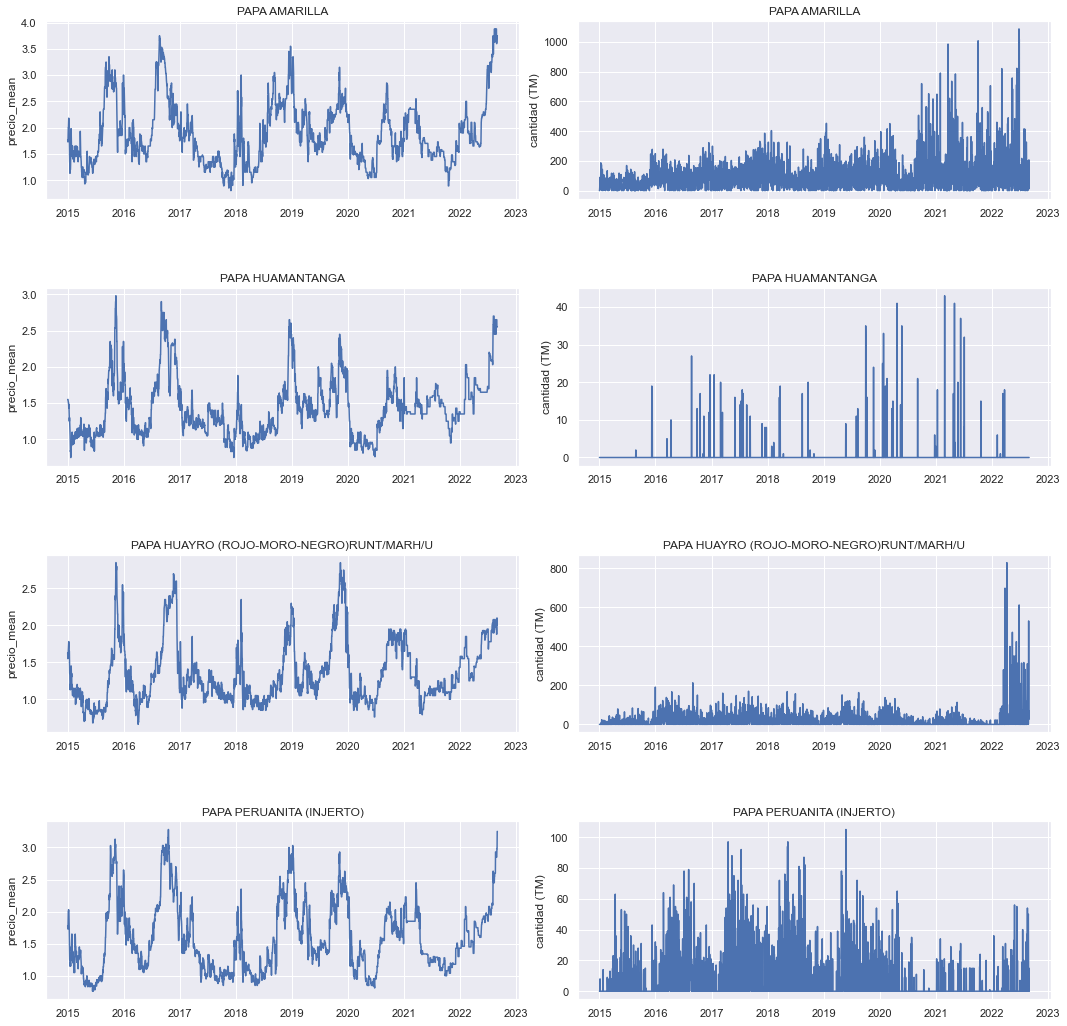

In [34]:
fig, ax = plt.subplots(4, 2)
fig.subplots_adjust(hspace=0.5, wspace=0.125)
tipo_papas_g1 = papas_g1_completo.producto.unique()
for i in range(len(tipo_papas_g1)):
    sns.lineplot(
        x="date",
        y="precio_mean",
        data=papas_g1_completo[papas_g1_completo["producto"] == tipo_papas_g1[i]][
            ["date", "precio_mean", "producto"]
        ],
        hue="producto",
        ax=ax[i][0],
        legend=False,
    ).set(title=tipo_papas_g1[i], xlabel=None)
    sns.lineplot(
        x="date",
        y="cantidad (TM)",
        data=papas_procedencia_total_g1[
            papas_procedencia_total_g1["producto"] == tipo_papas_g1[i]
        ][["date", "cantidad (TM)", "producto"]],
        hue="producto",
        ax=ax[i][1],
        legend=False,
    ).set(title=tipo_papas_g1[i], xlabel=None)
fig.savefig("./Graphs/papas_g1_vs_procedencia.png")

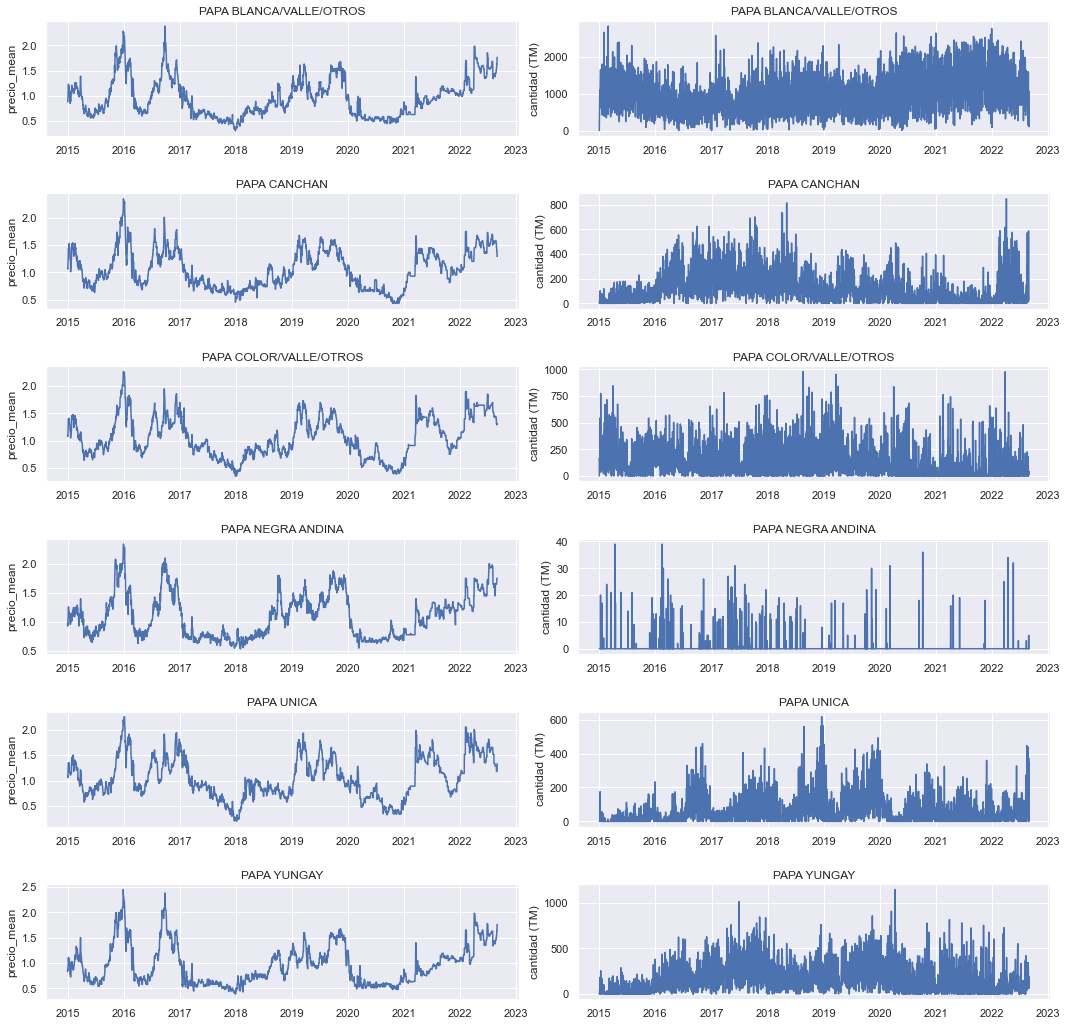

In [35]:
fig, ax = plt.subplots(6, 2)
fig.subplots_adjust(hspace=0.5, wspace=0.125)
tipo_papas_g2 = papas_g2_completo.producto.unique()
for i in range(len(tipo_papas_g2)):
    sns.lineplot(
        x="date",
        y="precio_mean",
        data=papas_g2_completo[papas_g2_completo["producto"] == tipo_papas_g2[i]][
            ["date", "precio_mean", "producto"]
        ],
        hue="producto",
        ax=ax[i][0],
        legend=False,
    ).set(title=tipo_papas_g2[i], xlabel=None)
    sns.lineplot(
        x="date",
        y="cantidad (TM)",
        data=papas_procedencia_total_g2[
            papas_procedencia_total_g2["producto"] == tipo_papas_g2[i]
        ][["date", "cantidad (TM)", "producto"]],
        hue="producto",
        ax=ax[i][1],
        legend=False,
    ).set(title=tipo_papas_g2[i], xlabel=None)
fig.savefig("./Graphs/papas_g2_vs_procedencia.png")


# Análisis por precio de combustible

In [36]:
precio_petroleo = pd.read_csv('../Data/precio_petroleo_diario.csv')

month_map = {
    "Ene": "01",
    "Feb": "02",
    "Mar": "03",
    "Abr": "04",
    "May": "05",
    "Jun": "06",
    "Jul": "07",
    "Ago": "08",
    "Set": "09",
    "Oct": "10",
    "Nov": "11",
    "Dic": "12",
}


def parse_date(row):
    return (
        row["fecha"][:2] + "-" + month_map[row["fecha"][2:5]] + "-" + row["fecha"][5:]
    )


precio_petroleo["date"] = precio_petroleo.apply(lambda row: parse_date(row), axis=1)
precio_petroleo["date"] = pd.to_datetime(precio_petroleo["date"], format="%d-%m-%y")
precio_petroleo = precio_petroleo[["date", "precio"]]
precio_petroleo = precio_petroleo[precio_petroleo["date"] >= "2015-01-01"]
precio_petroleo["precio"] = precio_petroleo.apply(
    lambda row: 0 if row["precio"] == "n.d." else row["precio"], axis=1
)
precio_petroleo["precio"] = precio_petroleo["precio"].astype(float)


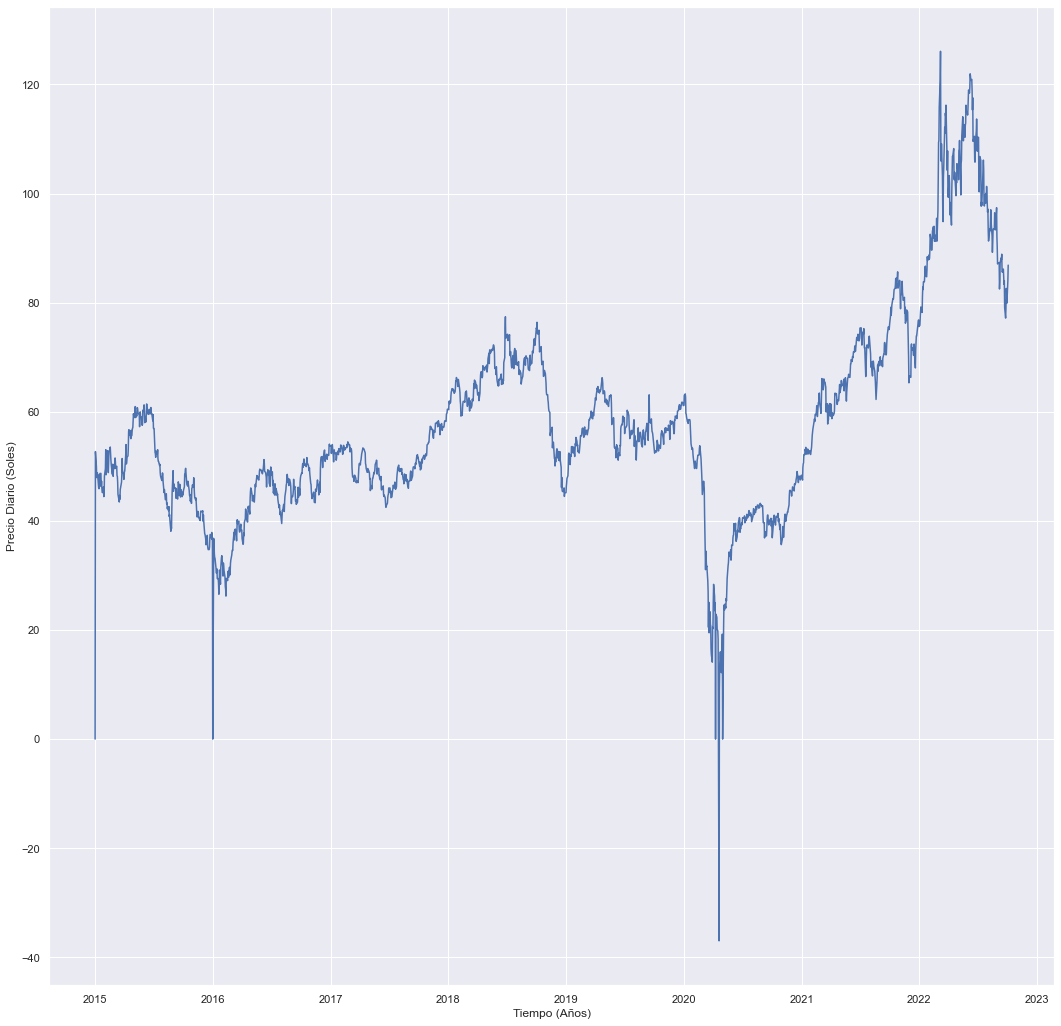

In [37]:
ax = sns.lineplot(
    data=precio_petroleo,
    x="date",
    y="precio",
)
ax.set_xlabel("Tiempo (Años)")
ax.set_ylabel("Precio Diario (Soles)")
fig = ax.get_figure()

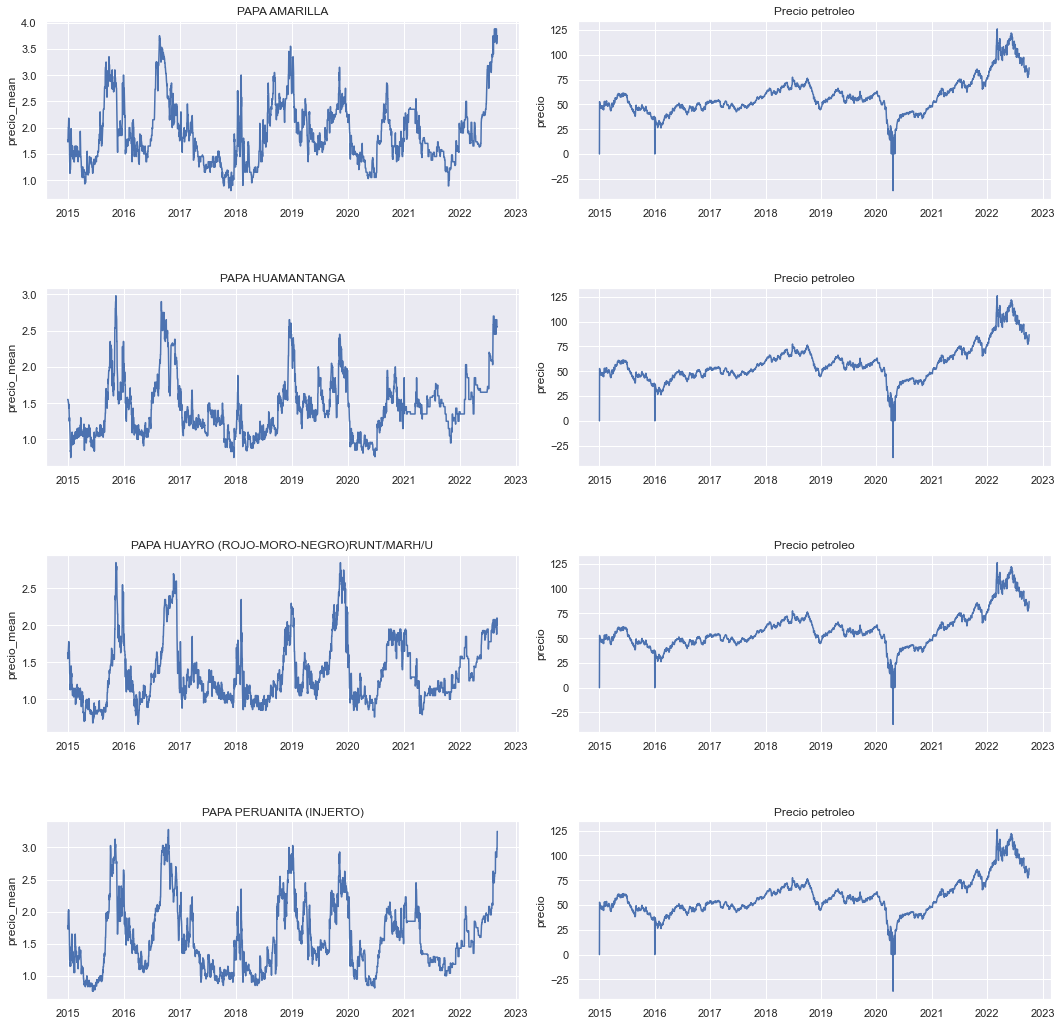

In [38]:
fig, ax = plt.subplots(4, 2)
fig.subplots_adjust(hspace=0.5, wspace=0.125)
tipo_papas_g1 = papas_g1_completo.producto.unique()
for i in range(len(tipo_papas_g1)):
    sns.lineplot(
        x="date",
        y="precio_mean",
        data=papas_g1_completo[papas_g1_completo["producto"] == tipo_papas_g1[i]][
            ["date", "precio_mean", "producto"]
        ],
        hue="producto",
        ax=ax[i][0],
        legend=False,
    ).set(title=tipo_papas_g1[i], xlabel=None)
    sns.lineplot(
        data=precio_petroleo,
        x="date",
        y="precio",
        ax=ax[i][1],
        legend=False,
    ).set(title="Precio petroleo", xlabel=None)
fig.savefig("./Graphs/papas_g1_vs_petroleo.png")


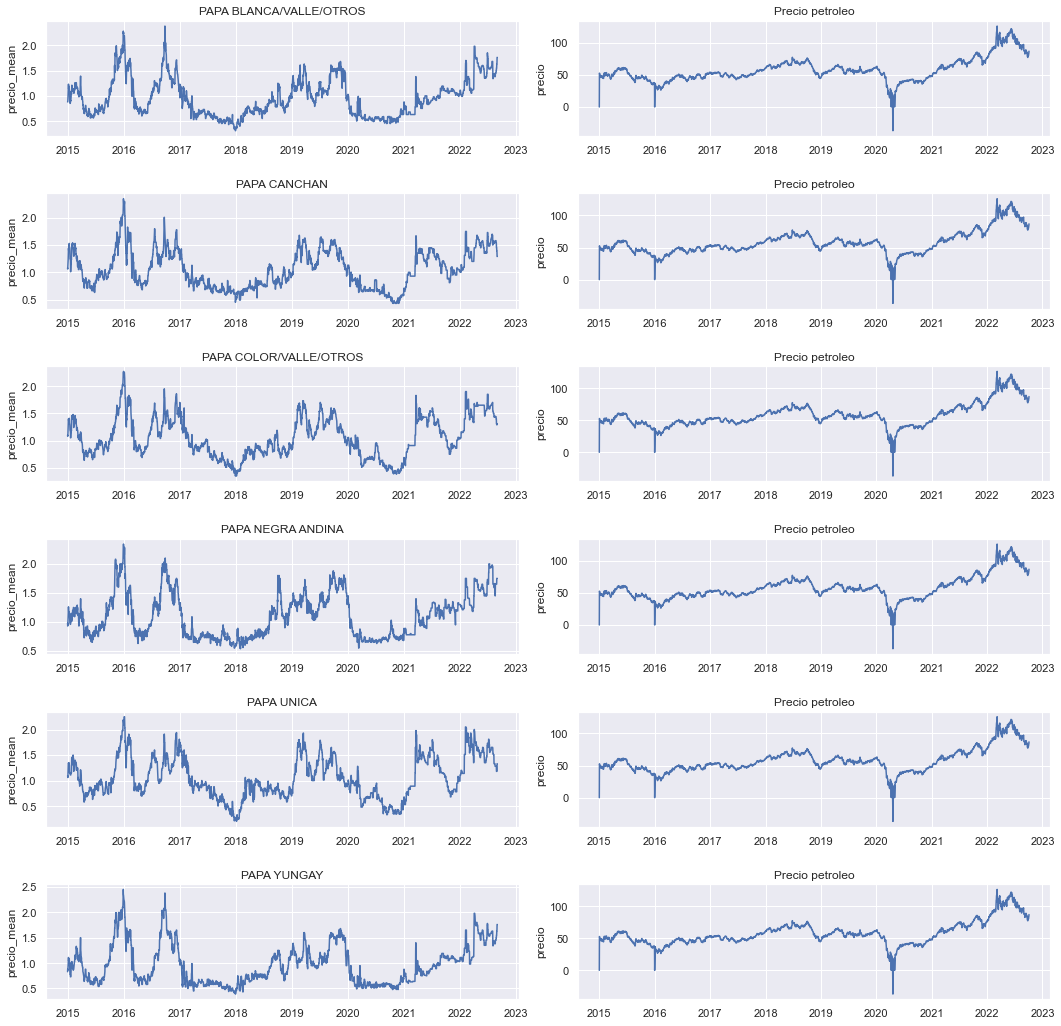

In [39]:
fig, ax = plt.subplots(6, 2)
fig.subplots_adjust(hspace=0.5, wspace=0.125)
tipo_papas_g2 = papas_g2_completo.producto.unique()
for i in range(len(tipo_papas_g2)):
    sns.lineplot(
        x="date",
        y="precio_mean",
        data=papas_g2_completo[papas_g2_completo["producto"] == tipo_papas_g2[i]][
            ["date", "precio_mean", "producto"]
        ],
        hue="producto",
        ax=ax[i][0],
        legend=False,
    ).set(title=tipo_papas_g2[i], xlabel=None)
    sns.lineplot(
        data=precio_petroleo,
        x="date",
        y="precio",
        ax=ax[i][1],
        legend=False,
    ).set(title="Precio petroleo", xlabel=None)

fig.savefig("./Graphs/papas_g2_vs_petroleo.png")


# Analisis Junin - Temperatura

In [40]:
data_temp = pd.read_csv("../Data/temperatura_automatico.csv")

In [41]:
data_temp = data_temp[["DEPARTAMENTO", "FECHA", "TEMPERATURA"]][
    data_temp["DEPARTAMENTO"] == "JUNIN"
]
data_temp = data_temp[data_temp["TEMPERATURA"] != "S/D"]
data_temp["TEMPERATURA"] = pd.to_numeric(data_temp["TEMPERATURA"], downcast="float")
data_temp["FECHA"] = pd.to_datetime(data_temp["FECHA"], format="%Y-%m-%d")
data_temp_monthly = data_temp
data_temp.head()


,DEPARTAMENTO,FECHA,TEMPERATURA
35813,JUNIN,2018-01-01,0.0
35814,JUNIN,2018-01-01,-0.1
35815,JUNIN,2018-01-01,-0.4
35816,JUNIN,2018-01-01,-0.3
35817,JUNIN,2018-01-01,0.0


In [42]:
data_temp_grouped = (
    data_temp.groupby(["DEPARTAMENTO", "FECHA"])
    .agg({"TEMPERATURA": "mean"})
    .reset_index()
)


In [43]:
data_temp_monthly.index = data_temp_monthly["FECHA"]
data_temp_monthly = data_temp_monthly["TEMPERATURA"]
data_temp_monthly = data_temp_monthly.groupby(pd.Grouper(freq="m")).mean()
data_temp_monthly.index = data_temp_monthly.index.strftime("%Y-%m")
data_temp_monthly = pd.DataFrame(
    {"FECHA": data_temp_monthly.index, "TEMPERATURA": data_temp_monthly.values}
)
data_temp_monthly["FECHA"] = pd.to_datetime(data_temp_monthly["FECHA"], format="%Y-%m")


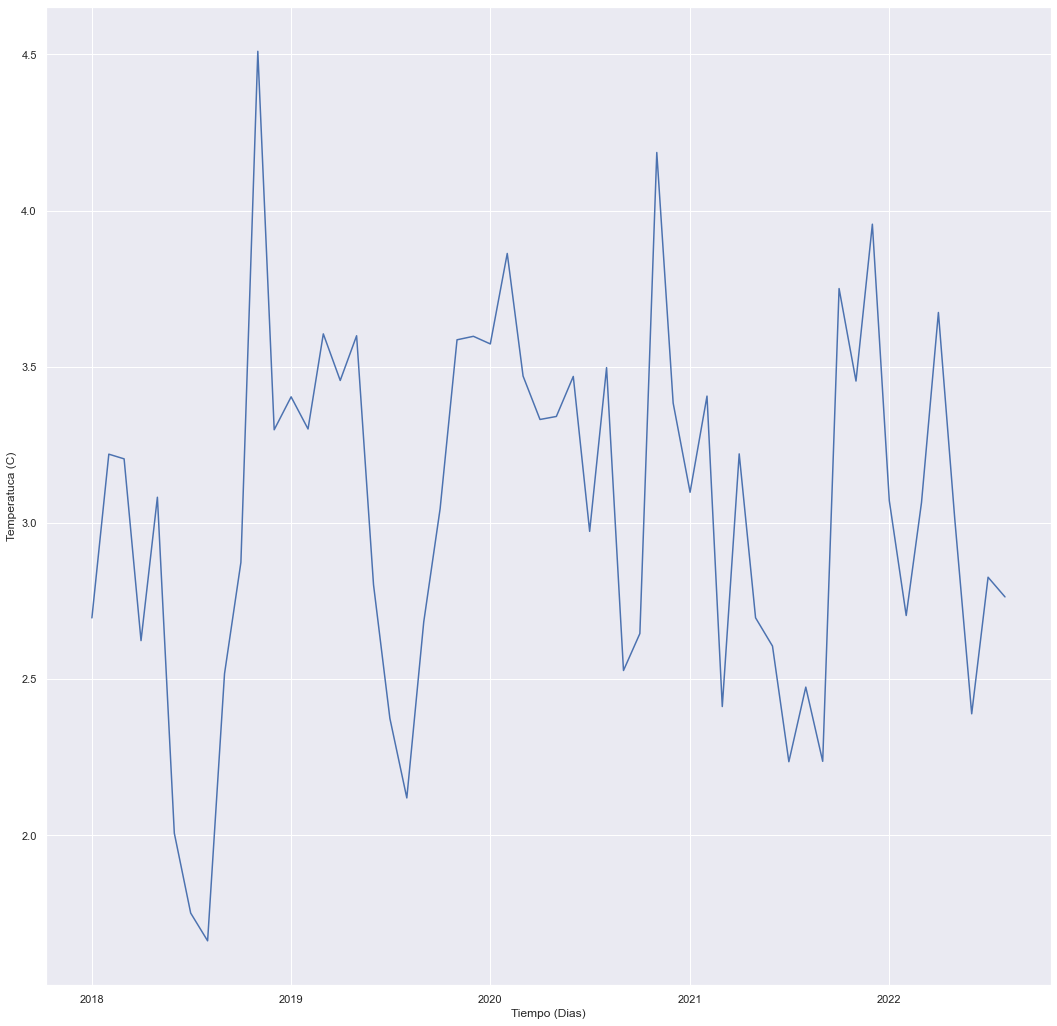

In [44]:
ax = sns.lineplot(
    data=data_temp_monthly,
    x="FECHA",
    y="TEMPERATURA"
)
ax.set_xlabel("Tiempo (Dias)")
ax.set_ylabel("Temperatuca (C)")
fig = ax.get_figure()

In [49]:
dataProcedenciaJunin_g1 = papas_procedencia_g1[papas_procedencia_g1["procedencia"] == "JUNIN"][["cantidad (TM)", "date"]]
dataProcedenciaJunin_g1["date"] = pd.to_datetime(dataProcedenciaJunin_g1["date"], format="%Y-%m")
dataProcedenciaJunin_g1 = dataProcedenciaJunin_g1[dataProcedenciaJunin_g1["date"] >= "2018-01-01"]
dataProcedenciaJunin_g1 = dataProcedenciaJunin_g1.groupby('date').sum().reset_index()
dataProcedenciaJunin_g1.index = dataProcedenciaJunin_g1["date"]
dataProcedenciaJunin_g1 = dataProcedenciaJunin_g1["cantidad (TM)"]
dataProcedenciaJunin_g1 = dataProcedenciaJunin_g1.groupby(pd.Grouper(freq="m")).sum()
dataProcedenciaJunin_g1.index = dataProcedenciaJunin_g1.index.strftime("%Y-%m")
dataProcedenciaJunin_g1 = pd.DataFrame(
    {"date": dataProcedenciaJunin_g1.index, "cantidad (TM)": dataProcedenciaJunin_g1.values}
)
dataProcedenciaJunin_g1["date"] = pd.to_datetime(dataProcedenciaJunin_g1["date"], format="%Y-%m")

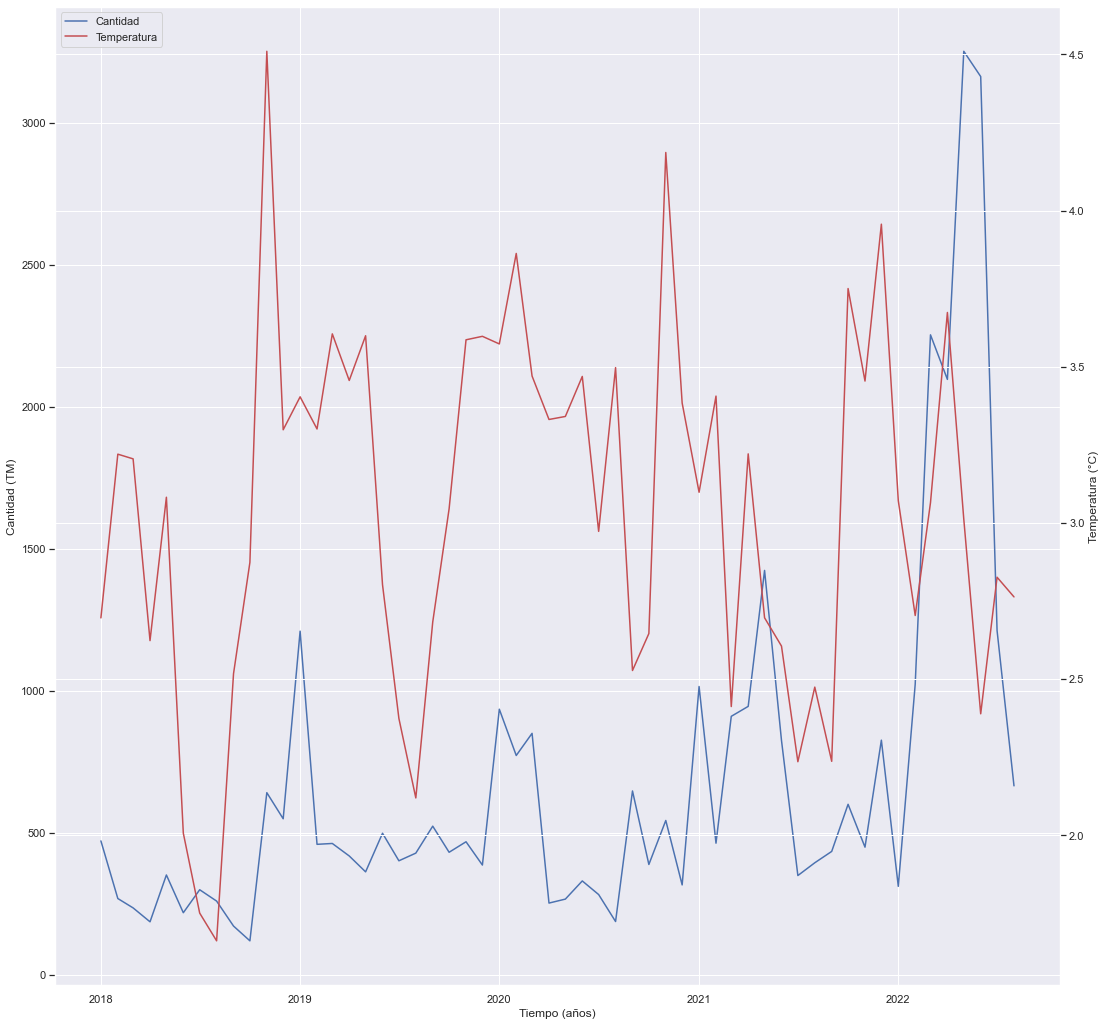

In [50]:
ax = sns.lineplot(data=dataProcedenciaJunin_g1, x="date", y="cantidad (TM)", label="Cantidad")
ax.set_xlabel("Tiempo (años)")
ax.set_ylabel("Cantidad (TM)")
ax2 = ax.twinx()
ax2.set_ylabel("Temperatura (°C)")
sns.lineplot(data=data_temp_monthly, x="FECHA", y="TEMPERATURA", ax=ax2, color="r", label="Temperatura", legend=False)
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc=2)
fig = ax.get_figure()
plt.show()
fig.savefig("./Graphs/temp_procedencia_g1.png")

In [51]:
dataProcedenciaJunin_g2 = papas_procedencia_g2[papas_procedencia_g2["procedencia"] == "JUNIN"][["cantidad (TM)", "date"]]
dataProcedenciaJunin_g2["date"] = pd.to_datetime(dataProcedenciaJunin_g2["date"], format="%Y-%m")
dataProcedenciaJunin_g2 = dataProcedenciaJunin_g2[dataProcedenciaJunin_g2["date"] >= "2018-01-01"]
dataProcedenciaJunin_g2 = dataProcedenciaJunin_g2.groupby('date').sum().reset_index()
dataProcedenciaJunin_g2.index = dataProcedenciaJunin_g2["date"]
dataProcedenciaJunin_g2 = dataProcedenciaJunin_g2["cantidad (TM)"]
dataProcedenciaJunin_g2 = dataProcedenciaJunin_g2.groupby(pd.Grouper(freq="m")).sum()
dataProcedenciaJunin_g2.index = dataProcedenciaJunin_g2.index.strftime("%Y-%m")
dataProcedenciaJunin_g2 = pd.DataFrame(
    {"date": dataProcedenciaJunin_g2.index, "cantidad (TM)": dataProcedenciaJunin_g2.values}
)
dataProcedenciaJunin_g2["date"] = pd.to_datetime(dataProcedenciaJunin_g2["date"], format="%Y-%m")

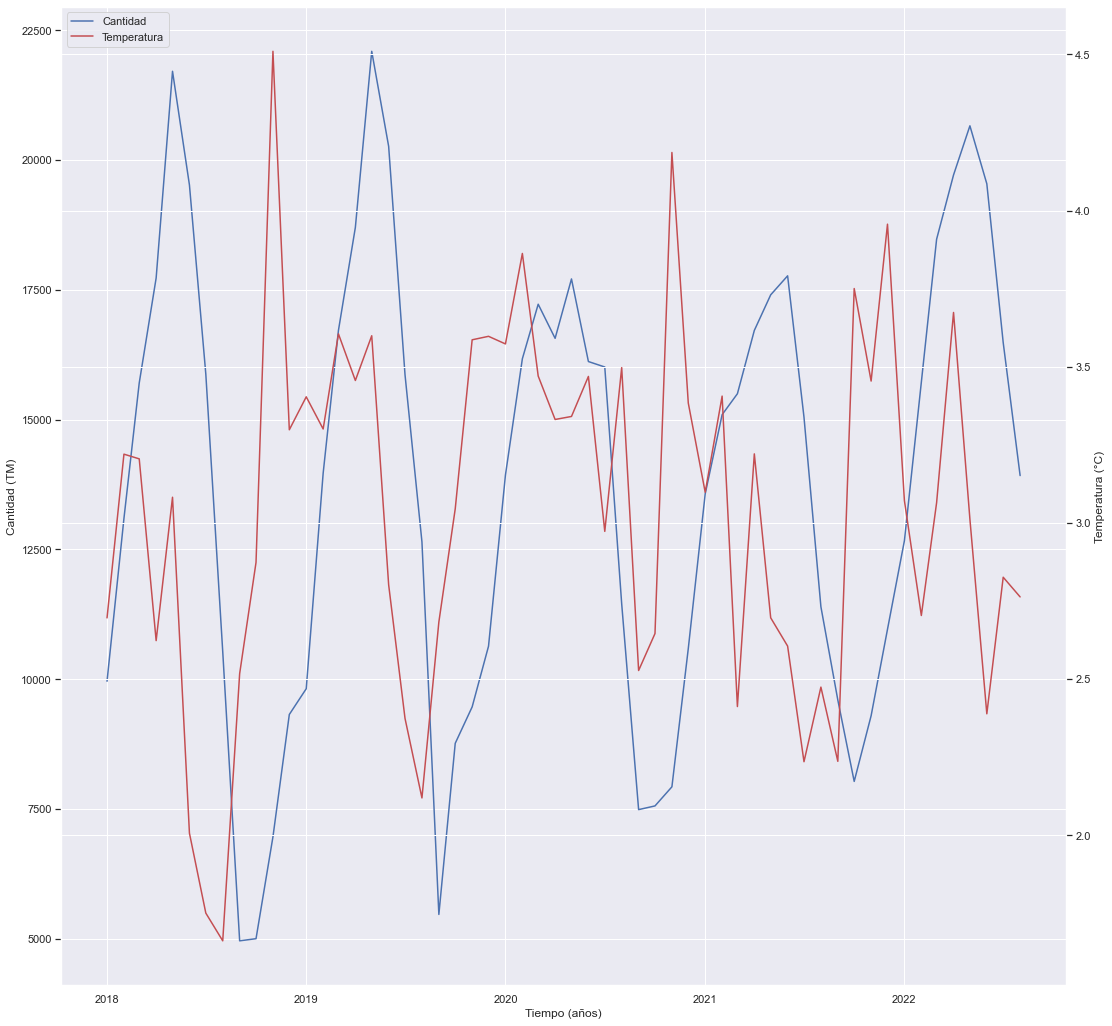

In [52]:
ax = sns.lineplot(data=dataProcedenciaJunin_g2, x="date", y="cantidad (TM)", label="Cantidad")
ax.set_xlabel("Tiempo (años)")
ax.set_ylabel("Cantidad (TM)")
ax2 = ax.twinx()
ax2.set_ylabel("Temperatura (°C)")
sns.lineplot(data=data_temp_monthly, x="FECHA", y="TEMPERATURA", ax=ax2, color="r", label="Temperatura", legend=False)
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc=2)
fig = ax.get_figure()
plt.show()
fig.savefig("./Graphs/temp_procedencia_g2.png")